Unsupervised Learning: https://medium.com/southworks/a-deeper-view-into-unsupervised-learning-concepts-and-techniques-7c404a3bc87b

- K-means clustering: predefined clustering, data points only belong to one group, iterative
- mean shift clustering: iterative, sliding window-based algorithm
- If there is pronounced skewness within the dataset, utilize SMOTE to over sample fraud values and underscore valid samples

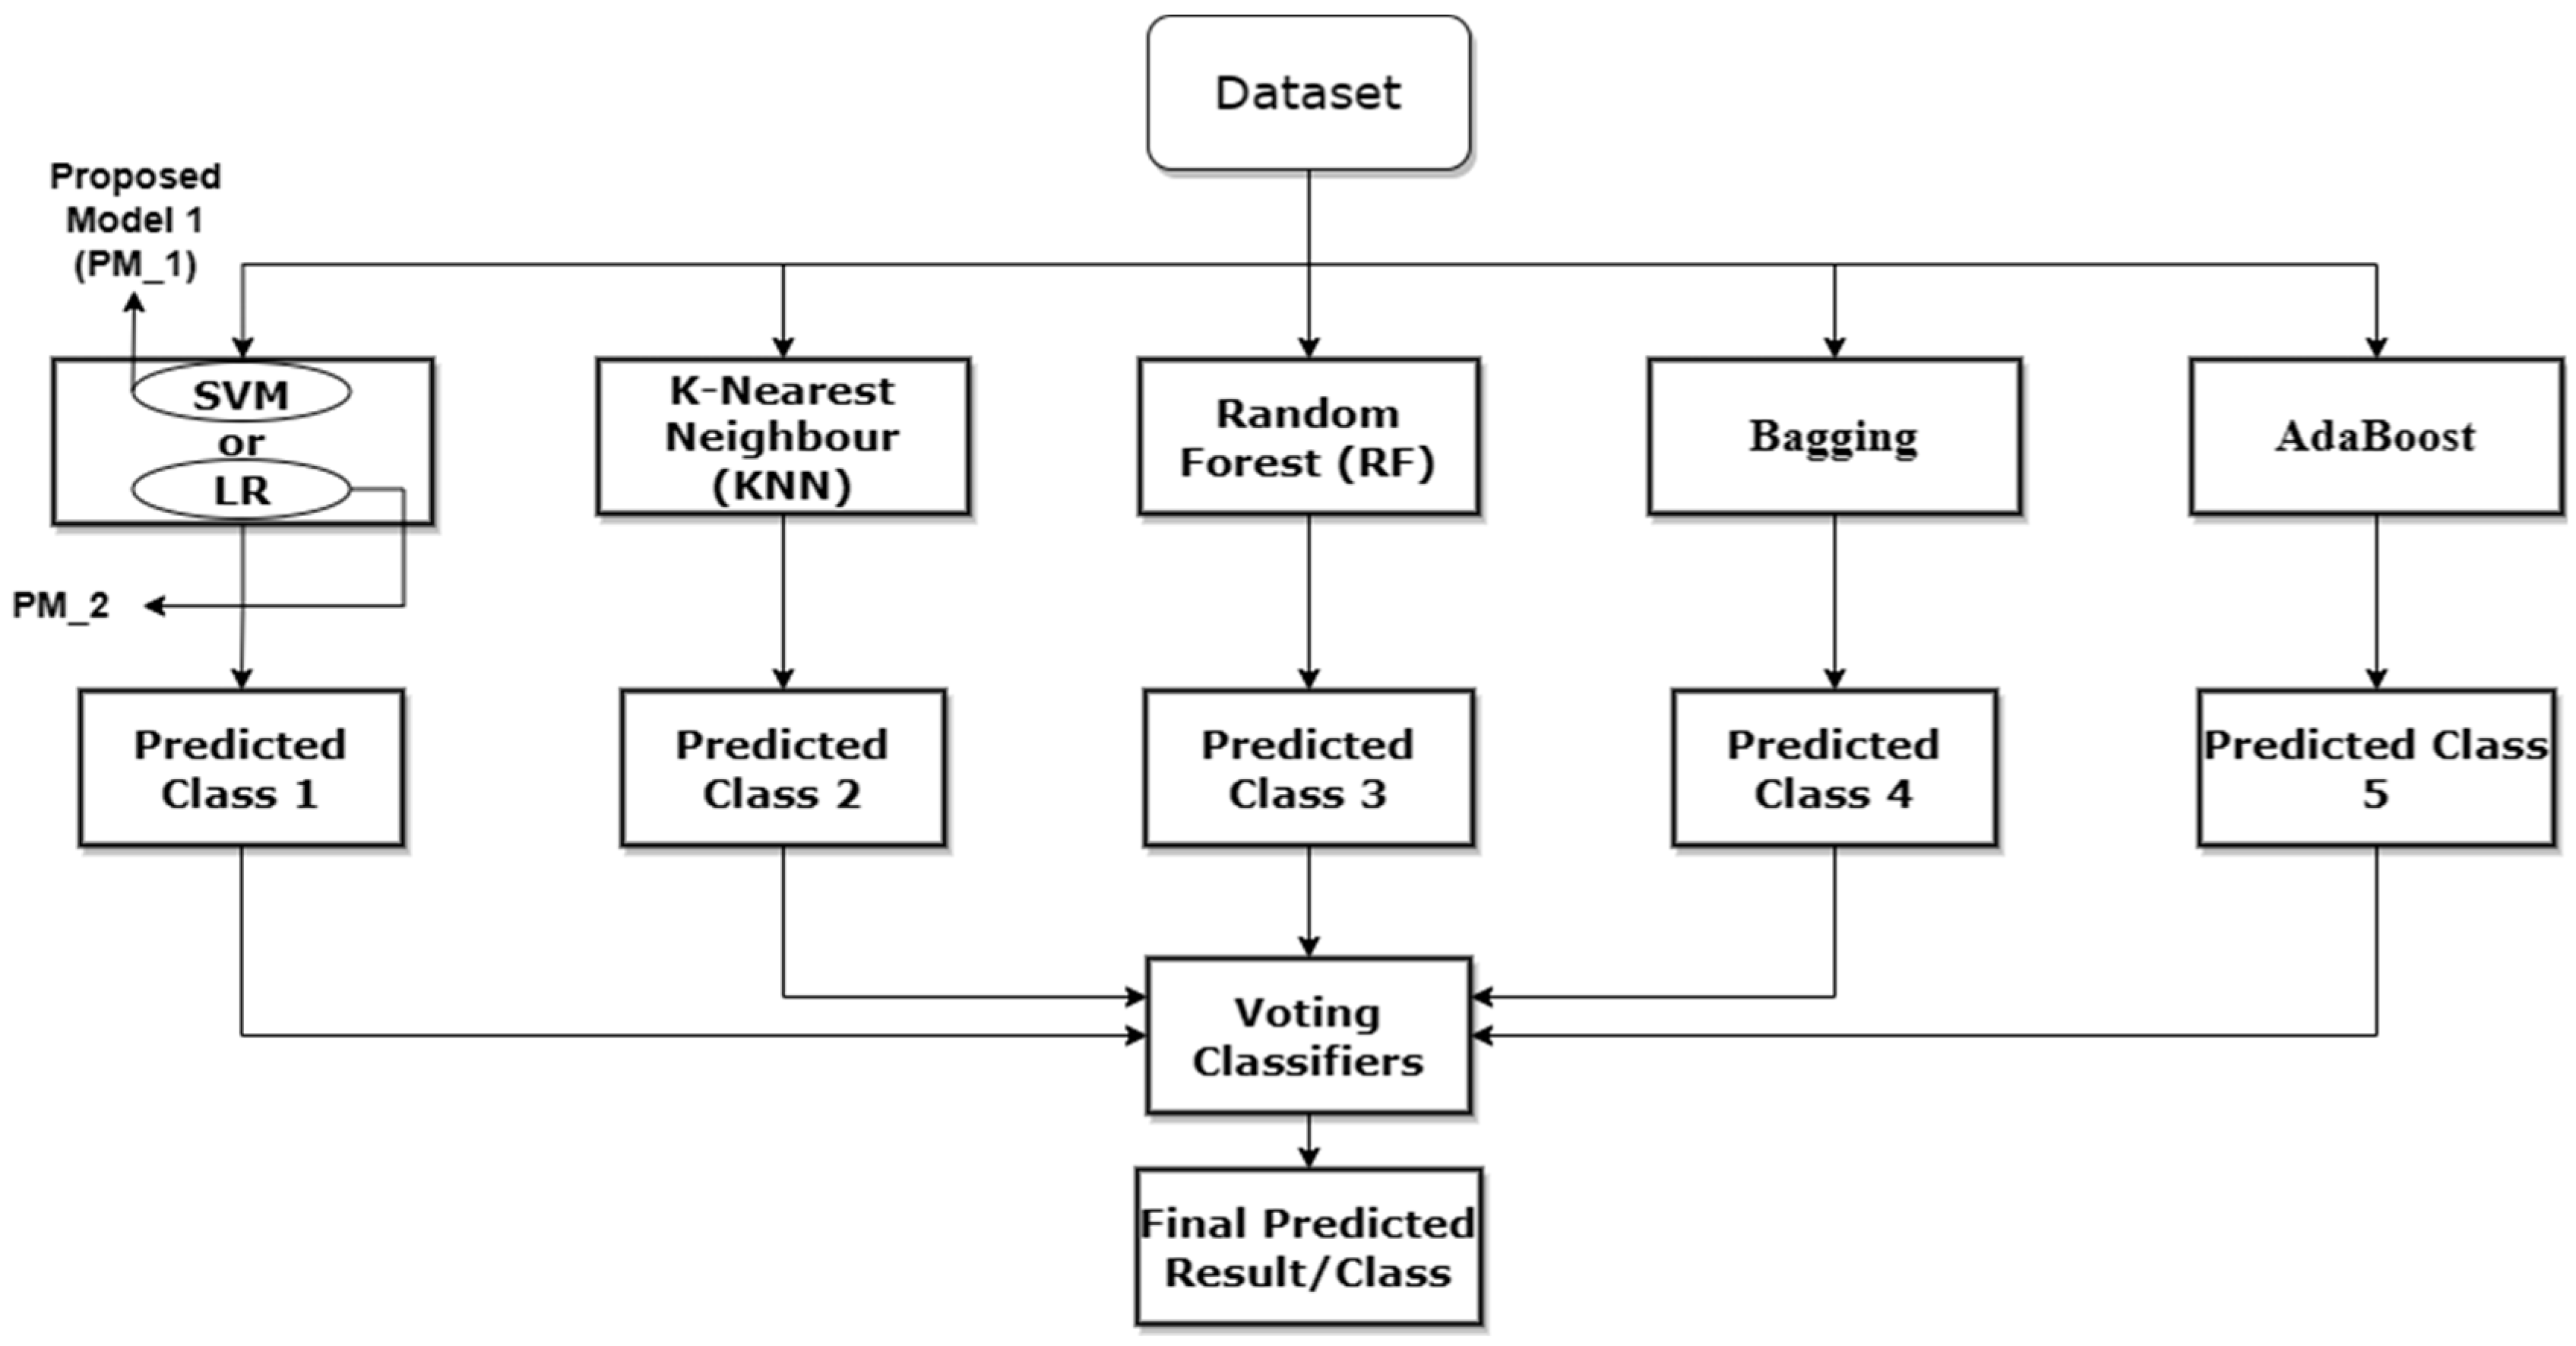

#Ensemble Method


- SVM excels in determining appropriate hyperplanes for class separation, whereas Logistic Regression (LR) models event probability. Random Forest (RF) builds robust decision trees, while K-Nearest Neighbors (KNN) performs classification based on the majority class among its nearest neighbours. Bagging uses KNN as its basic classifier to enrich the ensemble further. Boosting uses RF as its base. An important contribution is the Voting Classifier, which combines the various predictions from these classifiers. All of these choices were thoughtfully determined based on their demonstrated performance in earlier research, which was thoroughly detailed in the literature study. This extensive ensemble of classifiers is a deliberate tactic aiming to improve the prediction power of the proposed model.


** Additionally, ensembles prove to be computationally less intensive compared to deep learning architectures

- The ensemble combined Support Vector Machines (SVM), K-Nearest Neighbors (KNN), Random Forest (RF), Bagging, Adaboost, and a voting classifier

***Steps In This Project:
- Load and preprocess this dataset
    - Finding and removing null
    - Standardize amount (could run iterations with normalized amounts)
    - Checking and removing duplicates
- labels of data
- SMOTE and undersampling of data
- Split data in train and test data (80/20 rule)

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns

#DATA Pre-processing


dtypes ={
    'Amount':'float32',
    'Class':'float32'
}

df_1 = pd.read_csv("/Users/alexpham/Desktop/STATS : DATA SCIENCE PROJECT/Fraud Detection/creditcard.csv", dtype=dtypes)

df_1 = df_1.drop(columns=["Time"])
df_1.head(5)




,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0.0


In [3]:
#Check to see if there is and NA values 
df_1.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
df_1.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,7.388135e-17,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,-3.991394e-16,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,1.156587e-15,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,2.232685e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,-5.202306e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,5.932243e-17,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,-7.492834e-17,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,-2.801370e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,-4.642274e-16,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733
V10,7.388135e-17,-3.991394e-16,1.156587e-15,2.232685e-16,-5.202306e-16,5.932243e-17,-7.492834e-17,-2.801370e-16,-4.642274e-16,1.000000e+00,...,1.177547e-15,-6.418202e-16,3.214491e-16,-1.355885e-16,-2.846052e-16,-3.028119e-16,-2.197977e-16,4.864782e-17,-0.101502,-0.216883


In [5]:
#Standarize Amount data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df_1[['Amount']])


temp_df = pd.DataFrame(data=scaled)
df_1.insert(len(df_1.columns)-2, "Scaled Amounts", temp_df)


In [6]:
df_1.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Scaled Amounts,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,149.619995,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,2.690000,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,378.660004,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,123.500000,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,69.989998,0.0


In [7]:
df_1 = df_1.drop(columns=["Amount"])
df_1 = df_1.drop_duplicates()

In [8]:
df_1.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Scaled Amounts,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0.0


In [9]:
#0 == valid transaction
#1== fradulent transaction

df_1['Class'].value_counts()

0.0    275190
1.0       473
Name: Class, dtype: int64

In [10]:
#Positive Skew of Scaled Amounts
df_1.skew()

V1                -3.273070
V2                -4.653486
V3                -2.216730
V4                 0.681387
V5                -2.458790
V6                 1.867576
V7                 2.877722
V8                -8.292631
V9                 0.550965
V10                1.242165
V11                0.347772
V12               -2.208171
V13                0.061058
V14               -1.953613
V15               -0.295836
V16               -1.048371
V17               -3.802987
V18               -0.255710
V19                0.115957
V20               -2.045060
V21                2.784302
V22               -0.200868
V23               -5.805236
V24               -0.545636
V25               -0.408260
V26                0.587603
V27               -0.745732
V28               11.400938
Scaled Amounts    16.841621
Class             24.079142
dtype: float64

In [11]:
y = df_1[['Class']]
y

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
284802,0.0
284803,0.0
284804,0.0
284805,0.0


In [12]:
x = df_1.drop(columns=["Class"])
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Scaled Amounts
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249


In [14]:
##THIS IS THE MAIN BLOCK THAT I NEED TO COME BACK TO


from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE 
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from collections import Counter

#0 == valid transaction
#1== fradulent transaction

#Could play around with the sampling
sm = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(random_state = 42, sampling_strategy=1)
steps = [('o',sm),('u',under)]
pipeline = Pipeline(steps=steps)

#sampled training data
x_response, y_response = pipeline.fit_resample(x, y)
print(y_response.value_counts())

X_train, X_test, y_train, y_test = train_test_split(x_response, y_response, test_size=0.2, random_state = 42)

#why Minority oversampling vs. majority undersampling?
# The main issue with random under sampling is that we run the risk of having our classification model not perform as accurate as we would like, since there is a great deal of information loss


#need to wrap head around when to utilize under and oversampling? do we utlize it after or before train, test split?
# ** corect the imbalance after spliting the data

#The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.


Class
0.0      220152
1.0      220152
dtype: int64


In [16]:
#Linear Regression Model -> might need to change to 
#k-fold cross validation
#Grid Search CV
#Learning Curve


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix


#model is trained on the dataset that has equal fruad and non-fruad -> would we want to train the dataset on equal distribution?
regression = LogisticRegression()
regression.fit(x_response, y_response)


#need to check cross_val_score
cv = ShuffleSplit(n_splits=10, test_size=.20, random_state=0)
cross_val = cross_val_score(regression, X_test, y_test, cv=cv)
print(cross_val)

total = 0
for score in cross_val:
    total+=score

print(f'avg score before hyper-tuning: {total/len(cross_val)}') #~94.6%

y_pred_test = regression.predict(X_test)

print('CONFUSION MATRIX:\n', confusion_matrix(y_test,y_pred_test))

# #hyper-tune parameters

# score = []

# parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
#               {'penalty':['none', 'elasticnet', 'l1', 'l2']},
#               {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]

# grid_search = GridSearchCV(estimator = regression,  
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 5,
#                            verbose=0)

# grid_search.fit(x_response,np.ravel(y_response,order='C'))

# score.append({
#     'model': 'Logistic Regression',
#     'Best Score': grid_search.best_score_,
#     'Best Params': grid_search.best_params_
# })

# print(score)



/Users/alexpham/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/alexpham/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/alexpham/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/alexpham/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expec

[0.94316698 0.94424573 0.94447283 0.94379152 0.94299665 0.94214501
 0.94242889 0.94640322 0.94231534 0.94333731]
avg score before hyper-tuning: 0.9435303469028555
CONFUSION MATRIX:
 [[42827  1085]
 [ 3773 40376]]


In [18]:
#K-nearest neighbor 

from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3, weights='distance')
neigh.fit(x_response, y_response)


cv = ShuffleSplit(n_splits=10, test_size=.20, random_state=0)
cross_val = cross_val_score(neigh, X_test, y_test, cv=cv)
print(cross_val)

total = 0
for score in cross_val:
    total+=score

print(f'avg score before hyper-tuning: {total/len(cross_val)}') #~94.6%

y_pred_test = neigh.predict(X_test)

print('CONFUSION MATRIX:\n', confusion_matrix(y_test,y_pred_test))


/Users/alexpham/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/alexpham/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/alexpham/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/alexpham/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was 

[0.99699086 0.99653665 0.99613922 0.9964231  0.99693408 0.99676375
 0.99591211 0.9966502  0.99704764 0.99596889]
avg score before hyper-tuning: 0.9965366490660308
CONFUSION MATRIX:
 [[43912     0]
 [    0 44149]]


In [19]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(x_response, y_response)

cv = ShuffleSplit(n_splits=10, test_size=.20, random_state=0)
cross_val = cross_val_score(rfc, X_test, y_test, cv=cv)
print(cross_val)

total = 0
for score in cross_val:
    total+=score

print(f'avg score before hyper-tuning: {total/len(cross_val)}') #~92.5%

y_pred_test = rfc.predict(X_test)

print('CONFUSION MATRIX:\n', confusion_matrix(y_test,y_pred_test))

/var/folders/8x/tj45d2t17454d9s110msphqc0000gn/T/ipykernel_86891/1718288084.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_response, y_response)
/Users/alexpham/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/alexpham/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/alexpham/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A c

[0.92664509 0.92585022 0.92874581 0.92380628 0.92284108 0.92250043
 0.92420371 0.93005167 0.92301141 0.92227332]
avg score before hyper-tuning: 0.9249929029693975
CONFUSION MATRIX:
 [[43606   306]
 [ 6292 37857]]


In [ ]:
#Bagging

In [ ]:
#Adaboost